In [3]:
import numpy
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import altair as alt

In [103]:
alt.renderers.enable('notebook')
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('ODIs - Batting.csv')
df.head()

,Player,Career Span,Career Start,Career End,Matches Played,Innings Batted,Not Outs,Runs Scored,Highest Innings Score,Highest Innings Score Num,...,Balls Faced,Batting Strike Rate,Hundreds Scored,Scores Of Fifty Or More,Ducks Scored,Country,Player Count,5000+ Runs Scored,40+ Batting Avg,90+ Batting Strike Rate
0,EJG Morgan (2009-2018),2009-2018,2009,2018,189,176,27,5813,124*,124,...,6310,92.12,10,36,11,England,1,1,0,1
1,IR Bell (2004-2015),2004-2015,2004,2015,161,157,14,5416,141,141,...,7019,77.16,4,35,6,England,1,1,0,0
2,PD Collingwood (2001-2011),2001-2011,2001,2011,197,181,37,5092,120*,120,...,6614,76.98,5,26,7,England,1,1,0,0
3,JE Root (2013-2018),2013-2018,2013,2018,121,115,19,4946,133*,133,...,5722,86.43,13,29,4,England,1,0,1,0
4,AJ Stewart (1989-2003),1989-2003,1989,2003,170,162,14,4677,116,116,...,6841,68.36,4,28,13,England,1,0,0,0


In [14]:
nrows, ncols = df.shape
print(f"There are {nrows} rows and {ncols} columns")

There are 1984 rows and 21 columns


In [15]:
df.columns

Index(['Player', 'Career Span', 'Career Start', 'Career End', 'Matches Played',
       'Innings Batted', 'Not Outs', 'Runs Scored', 'Highest Innings Score',
       'Highest Innings Score Num', 'Batting Avg', 'Balls Faced',
       'Batting Strike Rate', 'Hundreds Scored', 'Scores Of Fifty Or More',
       'Ducks Scored', 'Country', 'Player Count', '5000+ Runs Scored',
       '40+ Batting Avg', '90+ Batting Strike Rate'],
      dtype='object')

In [49]:
india_df = df[df['Country']=="India"]
india_df.head()

,Player,Career Span,Career Start,Career End,Matches Played,Innings Batted,Not Outs,Runs Scored,Highest Innings Score,Highest Innings Score Num,...,Balls Faced,Batting Strike Rate,Hundreds Scored,Scores Of Fifty Or More,Ducks Scored,Country,Player Count,5000+ Runs Scored,40+ Batting Avg,90+ Batting Strike Rate
989,SR Tendulkar (1989-2012),1989-2012,1989,2012,463,452,41,18426,200*,200,...,21367,86.23,49,96,20,India,1,1,1,0
990,SC Ganguly (1992-2007),1992-2007,1992,2007,308,297,23,11221,183,183,...,15235,73.65,22,71,16,India,1,1,1,0
991,R Dravid (1996-2011),1996-2011,1996,2011,340,314,39,10768,153,153,...,15126,71.18,12,82,13,India,1,1,0,0
992,V Kohli (2008-2018),2008-2018,2008,2018,216,208,37,10232,183,183,...,11016,92.88,38,48,12,India,1,1,1,1
993,MS Dhoni (2004-2018),2004-2018,2004,2018,329,278,77,9999,183*,183,...,11435,87.44,9,67,9,India,1,1,1,0


In [105]:
india_df['Runs Scored'] = pd.to_numeric(india_df['Runs Scored'], errors='coerce')

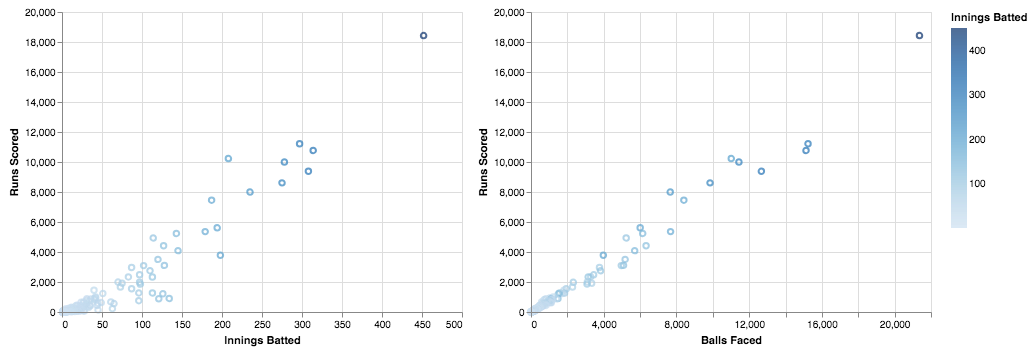

In [63]:
innings = alt.Chart(india_df).mark_point().encode(
    x='Innings Batted:Q',
    y='Runs Scored:Q',
    color='Innings Batted:Q',
    tooltip=['Player']
)

balls = alt.Chart(india_df).mark_point().encode(
    x='Balls Faced:Q',
    y='Runs Scored:Q',
    color='Innings Batted:Q',
    tooltip=['Player']
)

innings | balls

In [114]:
bangladesh_df = df[df['Country']=="Bangladesh"]
bangladesh_df['Runs Scored'] = pd.to_numeric(bangladesh_df['Runs Scored'], errors='coerce')
bangladesh_df['Balls Faced'] = pd.to_numeric(bangladesh_df['Balls Faced'], errors='coerce')
bangladesh_df.shape

(130, 21)

In [116]:
bangladesh_df['Strike Rate'] = (bangladesh_df['Runs Scored'] / bangladesh_df['Balls Faced'])*100
bangladesh_df['Strike Rate'] = bangladesh_df['Strike Rate'].round(2)

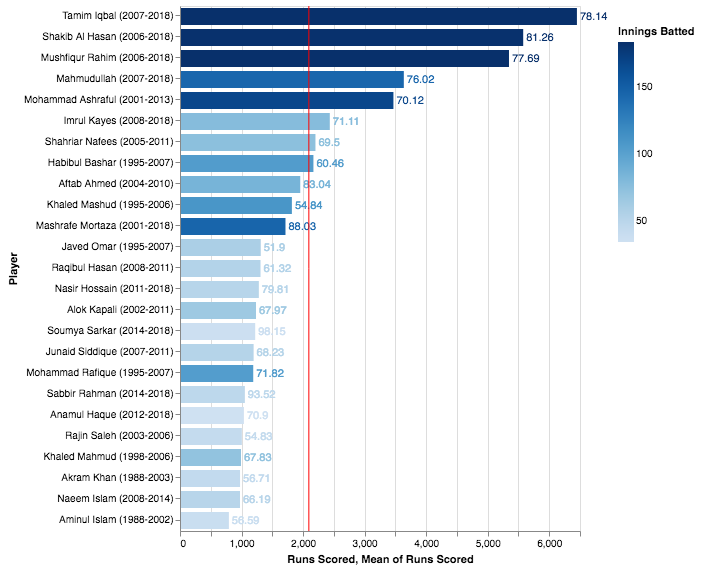

In [150]:
bangladesh_top_df = bangladesh_df.head(25)
bars = alt.Chart(bangladesh_top_df).mark_bar().encode(
    x=alt.X('Runs Scored:Q'),
    y=alt.Y('Player', sort=alt.Sort(field="Runs Scored", op="count", order='ascending')),
    color='Innings Batted:Q',
    tooltip=['Matches Played', 'Strike Rate']
)

rule = alt.Chart(bangladesh_top_df).mark_rule(color='red').encode(
    x='mean(Runs Scored):Q'
)

text = bars.mark_text(
    align='left',
    baseline='middle',
    dx=3  # Nudges text to right so it doesn't appear on top of the bar
).encode(
    text='Strike Rate:Q'
)

(bars + text + rule).configure_scale(bandPaddingInner=0.2).configure_legend(padding=20)

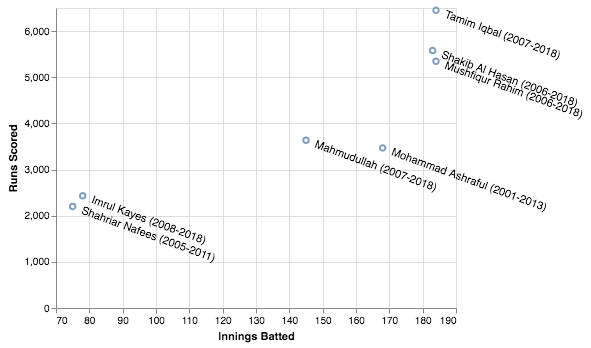

In [173]:
innings = alt.Chart(bangladesh_top_df.head(7)).mark_point().encode(
    x=alt.X('Innings Batted:Q', 
        scale=alt.Scale(zero=False)),
    y='Runs Scored:Q',
    tooltip=['Player']
)

text = innings.mark_text(
    align='left',
    baseline='top',
    dx=10,
    dy=-5,
    angle=20
).encode(
    text='Player:N'
)

(innings + text).configure_axis(labelOverlap=True)

In [180]:
india_df['Runs Scored'] = pd.to_numeric(india_df['Runs Scored'], errors='coerce')
india_df['Balls Faced'] = pd.to_numeric(india_df['Balls Faced'], errors='coerce')
india_df['Strike Rate'] = (india_df['Runs Scored'] / india_df['Balls Faced'])*100
india_df['Strike Rate'] = india_df['Strike Rate'].round(2)

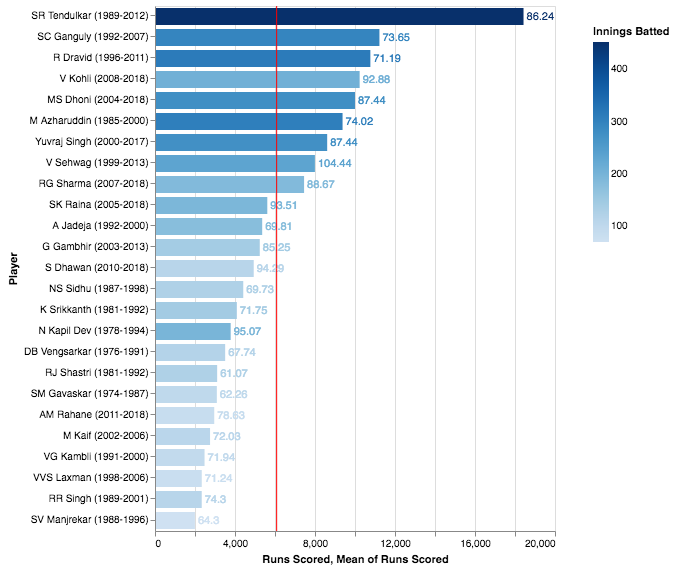

In [191]:
india_top_df = india_df.head(25)
bars = alt.Chart(india_top_df).mark_bar().encode(
    x=alt.X('Runs Scored:Q'),
    y=alt.Y('Player', sort=alt.Sort(field="Runs Scored", op="count", order='ascending')),
    color='Innings Batted:Q',
    tooltip=['Matches Played', 'Strike Rate']
)

rule = alt.Chart(india_top_df).mark_rule(color='red').encode(
    x='mean(Runs Scored):Q'
)

text = bars.mark_text(
    align='left',
    baseline='middle',
    dx=3  # Nudges text to right so it doesn't appear on top of the bar
).encode(
    text='Strike Rate:Q'
)

(bars + text + rule).configure_scale(bandPaddingInner=0.2).configure_legend(padding=20)